In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## Toy data
points = np.array([[0, 2, 3], 
                  [2, 4, 5],
                  [1, 2, 3]])

In [21]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

In [11]:
def draw_vertices_xy(points):
    plt.plot(points[:, 0], points[:, 1], 'o', c='black')

In [19]:
def draw_edge_xy(ptA, ptB, correct=False):
    x_coords = np.array([ptA[0], ptB[0]])
    y_coords = np.array([ptA[1], ptB[1]])
    if correct:
        line = plt.plot(x_coords, y_coords, 'green')[0]
        add_arrow(line)
    else:
        line = plt.plot(x_coords, y_coords, 'red')[0]
        add_arrow(line)

In [26]:
def draw_edge_xyz(ptA, ptB, correct=False):
    x_coords = np.array([ptA[0], ptB[0]])
    y_coords = np.array([ptA[1], ptB[1]])
    z_coords = np.array([ptA[2], ptB[2]])

    if correct:
        line = plt.plot(x_coords, y_coords, z_coords, 'green')[0]
#         add_arrow(line)
    else:
        line = plt.plot(x_coords, y_coords, z_coords, 'red')[0]
#         add_arrow(line)

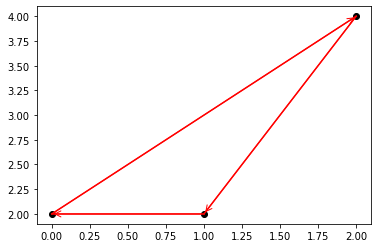

In [24]:
draw_vertices_xy(points)
draw_edge_xy(points[0], points[1])
draw_edge_xy(points[1], points[2])
draw_edge_xy(points[2], points[0])

plt.show()

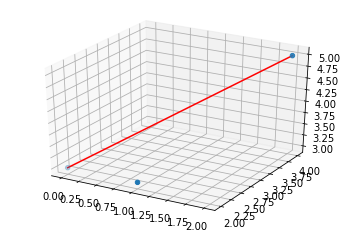

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
draw_edge_xyz(points[0], points[1])

In [28]:
# pos is (max_hits, 3) containing XYZ
# Rin, Rout is (max_hits, max_edges)
# Edge_Labels is (1, max_edges), 1 if actually present
# plot_fn is a plotting function taking two points and a correct label

def draw_plot(pos, Rin, Rout, Edge_Labels, plot_fn):
    num_edges = Rin.shape[1]
    for edge_idx in range(num_edges):
        # checking if edge or padding
        if sum(Rin[:, edge_idx]) != 0:
            ptA_idx = np.nonzero(Rout[:, edge_idx])[0][0]
            ptB_idx = np.nonzero(Rin[:, edge_idx])[0][0]
            
            ptA = pos[ptA_idx]
            ptB = pos[ptB_idx]
            
            correct = bool(Edge_Labels[edge_idx])
            plot_fn(ptA, ptB, correct)
            
            